In [6]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
train_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s4e8/train.csv')
test_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s4e8/test.csv')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3116945.0,1.558472e+06,899784.661740,0.00,779236.00,1558472.00,2337708.00,3116944.00
cap-diameter,3116941.0,6.309848e+00,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333e+00,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,1.115379e+01,8.095477,0.00,4.97,9.65,15.63,102.90


In [11]:
train_df.isnull().sum()/len(train_df)*100

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [12]:
test_df.isnull().sum()/len(train_df)*100

id                       0.000000
cap-diameter             0.000225
cap-shape                0.000995
cap-surface             14.337885
cap-color                0.000417
does-bruise-or-bleed     0.000321
gill-attachment         11.223201
gill-spacing            26.936471
gill-color               0.001572
stem-height              0.000032
stem-width               0.000000
stem-root               58.968381
stem-surface            42.396898
stem-color               0.000674
veil-type               63.252480
veil-color              58.586982
has-ring                 0.000610
ring-type                2.765368
spore-print-color       60.944835
habitat                  0.000802
season                   0.000000
dtype: float64

In [13]:
#dropping columns with more than 10% missing values
train_df.drop(['cap-surface','gill-attachment','gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'],axis=1,inplace=True)

In [14]:
test_df.drop(['cap-surface','gill-attachment','gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'],axis=1,inplace=True)

### Checking missing values

In [15]:
(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False)

ring-type               4.134818
gill-color              0.001829
habitat                 0.001444
cap-shape               0.001283
stem-color              0.001219
has-ring                0.000770
cap-color               0.000385
does-bruise-or-bleed    0.000257
cap-diameter            0.000128
id                      0.000000
class                   0.000000
stem-height             0.000000
stem-width              0.000000
season                  0.000000
dtype: float64

<Axes: xlabel='class', ylabel='count'>

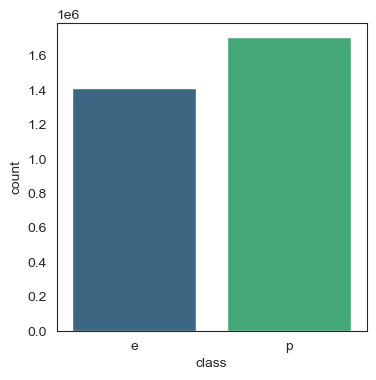

In [16]:
plt.figure(figsize=(4,4))
sns.set_style('white')
sns.countplot(x='class',data=train_df,palette='viridis')

In [17]:
#filling ring type column
train_df['ring-type'].value_counts()/len(train_df)*100

ring-type
f                       79.474293
e                        3.850116
z                        3.650369
l                        2.356249
r                        2.178704
p                        2.171293
g                        2.043251
m                        0.128074
t                        0.003144
d                        0.001187
n                        0.001091
x                        0.001027
b                        0.000930
y                        0.000802
s                        0.000577
k                        0.000577
a                        0.000513
h                        0.000481
w                        0.000449
u                        0.000417
c                        0.000353
o                        0.000289
ring-type                0.000225
i                        0.000128
does f                   0.000096
season                   0.000096
15                       0.000032
14                       0.000032
2.87                     0.000032
sp  

In [18]:
#most values are f
train_df['ring-type'].fillna('f',inplace=True)
test_df['ring-type'].fillna('f',inplace=True)

In [19]:
(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False).head(10)

gill-color              0.001829
habitat                 0.001444
cap-shape               0.001283
stem-color              0.001219
has-ring                0.000770
cap-color               0.000385
does-bruise-or-bleed    0.000257
cap-diameter            0.000128
id                      0.000000
class                   0.000000
dtype: float64

In [20]:
(test_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False).head(10)

gill-color              0.001572
cap-shape               0.000995
habitat                 0.000802
stem-color              0.000674
has-ring                0.000610
cap-color               0.000417
does-bruise-or-bleed    0.000321
cap-diameter            0.000225
stem-height             0.000032
id                      0.000000
dtype: float64

In [21]:
#gill color
train_df['gill-color'].value_counts()/len(train_df)*100

gill-color
w       29.886251
n       17.433288
y       15.061671
p       11.024449
g        6.806793
          ...    
9.46     0.000032
5.01     0.000032
3.4      0.000032
17       0.000032
8.37     0.000032
Name: count, Length: 63, dtype: float64

In [22]:
train_df['gill-color'].fillna('w',inplace=True)
test_df['gill-color'].fillna('w',inplace=True)

In [23]:
train_df['habitat'].value_counts()/len(train_df)*100

habitat
d                       69.862413
g                       14.594675
l                        5.514759
m                        4.843493
h                        3.854319
w                        0.594492
p                        0.551181
u                        0.168883
e                        0.001765
s                        0.001668
n                        0.001315
t                        0.001283
r                        0.001219
y                        0.001091
a                        0.001091
k                        0.000995
c                        0.000834
b                        0.000577
o                        0.000385
f                        0.000353
i                        0.000225
x                        0.000160
z                        0.000160
habitat                  0.000160
class                    0.000096
spore-print-color        0.000096
ring-type                0.000064
18.35                    0.000032
3.68                     0.000032
2.44  

In [24]:
train_df['habitat'].fillna('d',inplace=True)
test_df['habitat'].fillna('d',inplace=True)

In [25]:
#cap shape
train_df['cap-shape'].value_counts()/len(train_df)*100

cap-shape
x        46.071586
f        21.695538
s        11.714868
b        10.223023
o         3.491720
           ...    
12.62     0.000032
5.15      0.000032
19.04     0.000032
49.21     0.000032
19.06     0.000032
Name: count, Length: 74, dtype: float64

In [26]:
train_df['cap-shape'].fillna('x',inplace=True)
test_df['cap-shape'].fillna('x',inplace=True)

In [27]:
train_df['stem-color'].value_counts()/len(train_df)*100

stem-color
w                    38.391342
n                    32.193831
y                    11.997998
g                     4.235525
o                     3.578536
e                     3.316485
u                     2.150086
p                     1.754603
k                     1.080417
r                     0.716375
l                     0.320634
b                     0.236289
f                     0.018383
s                     0.001636
t                     0.001283
a                     0.001155
x                     0.000642
i                     0.000610
d                     0.000513
h                     0.000385
m                     0.000353
c                     0.000225
z                     0.000192
ring-type             0.000096
class                 0.000064
spore-print-color     0.000064
is n                  0.000032
6.31                  0.000032
12.92                 0.000032
3.98                  0.000032
20.07                 0.000032
7.7                   0.0000

In [28]:
train_df['stem-color'].fillna('w',inplace=True)
test_df['stem-color'].fillna('w',inplace=True)

In [29]:
train_df['has-ring'].value_counts().head(5)

has-ring
f    2368820
t     747982
r         16
h         13
c         11
Name: count, dtype: int64

In [30]:
train_df['has-ring'].fillna('f',inplace=True)
test_df['has-ring'].fillna('f',inplace=True)

In [31]:
train_df['cap-color'].value_counts()

cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

In [32]:
train_df['cap-color'].fillna('n',inplace=True)
test_df['cap-color'].fillna('n',inplace=True)

In [33]:
train_df['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [34]:
train_df['does-bruise-or-bleed'].fillna('f',inplace=True)
test_df['does-bruise-or-bleed'].fillna('f',inplace=True)

In [35]:
train_df['cap-diameter'].describe()

count    3.116941e+06
mean     6.309848e+00
std      4.657931e+00
min      3.000000e-02
25%      3.320000e+00
50%      5.750000e+00
75%      8.240000e+00
max      8.067000e+01
Name: cap-diameter, dtype: float64

In [36]:
train_df['cap-diameter'].fillna(train_df['cap-diameter'].mean(),inplace=True)
test_df['cap-diameter'].fillna(test_df['cap-diameter'].mean(),inplace=True)

In [37]:
(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False).head(10)

id                      0.0
class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
dtype: float64

In [38]:
(test_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False).head(10)

stem-height             0.000032
id                      0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-color              0.000000
stem-width              0.000000
stem-color              0.000000
has-ring                0.000000
dtype: float64

In [39]:
test_df['stem-height'].fillna(test_df['stem-height'].mean(),inplace=True)

In [40]:
(test_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False).head(10)

id                      0.0
cap-diameter            0.0
cap-shape               0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
dtype: float64

### No Missing values

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  ring-type             object 
 12  habitat               object 
 13  season                object 
dtypes: float64(3), int64(1), object(10)
memory usage: 332.9+ MB


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-color            object 
 6   stem-height           float64
 7   stem-width            float64
 8   stem-color            object 
 9   has-ring              object 
 10  ring-type             object 
 11  habitat               object 
 12  season                object 
dtypes: float64(3), int64(1), object(9)
memory usage: 206.1+ MB


### Dropping id

In [43]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

### Processing data

In [44]:
#cap diameter
train_df['cap-diameter'].describe()

count    3.116945e+06
mean     6.309848e+00
std      4.657928e+00
min      3.000000e-02
25%      3.320000e+00
50%      5.750000e+00
75%      8.240000e+00
max      8.067000e+01
Name: cap-diameter, dtype: float64

In [45]:
train_df['cap-diameter'] = train_df['cap-diameter'].astype('float32')

In [46]:
#cap shape
train_df['cap-shape'].value_counts().head(25)

cap-shape
x       1436066
f        676238
s        365146
b        318646
o        108835
p        106967
c        104520
d            65
e            60
n            41
t            36
w            36
g            34
y            33
r            32
a            30
u            27
z            22
l            21
i            14
k            13
h             6
m             2
8             2
3.55          2
Name: count, dtype: int64

In [47]:
top_shapes = train_df['cap-shape'].value_counts().head(7).index
top_shapes

Index(['x', 'f', 's', 'b', 'o', 'p', 'c'], dtype='object', name='cap-shape')

In [48]:
#retaining only the important value
def cap_shape(value):
    if value not in top_shapes:
        return 'unkown'
    else:
        return value

In [49]:
train_df['cap-shape'].apply(cap_shape).value_counts()

cap-shape
x         1436066
f          676238
s          365146
b          318646
o          108835
p          106967
c          104520
unkown        527
Name: count, dtype: int64

In [50]:
test_df['cap-shape'].value_counts()

cap-shape
x       957980
f       452360
s       242698
b       211879
o        71972
         ...  
5.59         1
4.41         1
3.73         1
3.47         1
4.54         1
Name: count, Length: 62, dtype: int64

In [51]:
train_df['cap-shape'] = train_df['cap-shape'].apply(cap_shape)

In [52]:
test_df['cap-shape'] = test_df['cap-shape'].apply(cap_shape)

In [53]:
train_df['cap-color'].value_counts()

cap-color
n             1359554
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

In [54]:
test_df['cap-color'].value_counts()

cap-color
n                                                                                           904320
y                                                                                           259062
w                                                                                           253844
g                                                                                           140681
e                                                                                           131524
o                                                                                           119764
p                                                                                            61186
r                                                                                            51784
u                                                                                            48865
b                                                                                            40790


In [55]:
top_color = train_df['cap-color'].value_counts().head(12).index

In [56]:
top_color

Index(['n', 'y', 'w', 'g', 'e', 'o', 'p', 'r', 'u', 'b', 'k', 'l'], dtype='object', name='cap-color')

In [57]:
def cap_color(value):
    if value not in top_color:
        return 'unkown'
    else:
        return value

In [58]:
train_df['cap-color'] = train_df['cap-color'].apply(cap_color)
test_df['cap-color'] = test_df['cap-color'].apply(cap_color)

In [59]:
test_df['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f         1713672
t          364227
x              11
s               7
w               7
p               5
n               4
h               4
k               3
c               3
e               3
g               3
o               3
a               2
b               2
m               2
does t          1
season          1
i               1
r               1
l               1
y               1
Name: count, dtype: int64

In [60]:
top_dbd = train_df['does-bruise-or-bleed'].value_counts().head(2).index

In [61]:
def does_bruise_or_bleed(value):
    if value not in top_dbd:
        return 'unkown'
    else:
        return value

In [62]:
train_df['does-bruise-or-bleed'] = train_df['does-bruise-or-bleed'].apply(does_bruise_or_bleed)
test_df['does-bruise-or-bleed'] = test_df['does-bruise-or-bleed'].apply(does_bruise_or_bleed)

In [63]:
top_gc = train_df['gill-color'].value_counts().head(12).index

In [64]:
top_gc

Index(['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u'], dtype='object', name='gill-color')

In [65]:
def gill_color(value):
    if value not in top_gc:
        return 'unkown'
    else:
        return value

In [66]:
train_df['gill-color'] = train_df['gill-color'].apply(gill_color)
test_df['gill-color'] = test_df['gill-color'].apply(gill_color)

In [67]:
train_df['stem-height'] = train_df['stem-height'].astype('float32')

In [68]:
train_df['stem-width'] = train_df['stem-width'].astype('float32')

In [69]:
top_sc = train_df['stem-color'].value_counts().head(12).index

In [70]:
def stem_color(value):
    if value not in top_sc:
        return 'unkown'
    else:
        return value

In [71]:
train_df['stem-color'] = train_df['stem-color'].apply(stem_color)
test_df['stem-color'] = test_df['stem-color'].apply(stem_color)

In [72]:
top_hs = train_df['has-ring'].value_counts().head(2).index

In [73]:
def has_ring(value):
    if value not in top_hs:
        return 'unkown'
    else:
        return value

In [74]:
train_df['has-ring'] = train_df['has-ring'].apply(has_ring)
test_df['has-ring'] = test_df['has-ring'].apply(has_ring)

In [75]:
top_rt = train_df['ring-type'].value_counts().head(8).index

In [76]:
def ring_type(value):
    if value not in top_rt:
        return 'unkown'
    else:
        return value

In [77]:
train_df['ring-type'] = train_df['ring-type'].apply(ring_type)
test_df['ring-type'] = test_df['ring-type'].apply(ring_type)

In [78]:
top_hab = train_df['habitat'].value_counts().head(8).index

In [79]:
def habitat(value):
    if value not in top_hab:
        return 'unkown'
    else:
        return value

In [80]:
train_df['habitat'] = train_df['habitat'].apply(habitat)
test_df['habitat'] = test_df['habitat'].apply(habitat)

In [81]:
train_df['season'].value_counts()

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [82]:
test_df['season'].value_counts()

season
a    1029085
u     768267
w     185975
s      94637
Name: count, dtype: int64

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float32
 2   cap-shape             object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-color            object 
 6   stem-height           float32
 7   stem-width            float32
 8   stem-color            object 
 9   has-ring              object 
 10  ring-type             object 
 11  habitat               object 
 12  season                object 
dtypes: float32(3), object(10)
memory usage: 273.5+ MB


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-color             object 
 3   does-bruise-or-bleed  object 
 4   gill-color            object 
 5   stem-height           float64
 6   stem-width            float64
 7   stem-color            object 
 8   has-ring              object 
 9   ring-type             object 
 10  habitat               object 
 11  season                object 
dtypes: float64(3), object(9)
memory usage: 190.2+ MB


In [85]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()

In [86]:
cat_cols = ['cap-shape','cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-color','has-ring','ring-type', 'habitat', 'season']

In [87]:
train_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [88]:
for col in cat_cols:
    train_df[col] = lbl_en.fit_transform(train_df[col])
    test_df[col] = lbl_en.transform(test_df[col])

In [89]:
class_map = {'p':1,'e':0}
train_df['class'] = train_df['class'].replace(class_map)

In [90]:
train_df.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,8.80,2,9,0,11,4.51,15.39,11,0,1,0,0
1,1,4.51,7,6,0,5,4.79,6.48,6,1,8,0,3
2,0,6.94,2,0,0,11,6.85,9.93,5,0,1,3,3
3,0,3.88,2,2,0,3,4.16,6.53,11,0,1,0,2
4,0,5.85,7,11,0,11,3.37,8.36,11,0,1,1,0


In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float32
 2   cap-shape             int64  
 3   cap-color             int64  
 4   does-bruise-or-bleed  int64  
 5   gill-color            int64  
 6   stem-height           float32
 7   stem-width            float32
 8   stem-color            int64  
 9   has-ring              int64  
 10  ring-type             int64  
 11  habitat               int64  
 12  season                int64  
dtypes: float32(3), int64(10)
memory usage: 273.5 MB


In [92]:
for col in cat_cols:
    train_df[col] = train_df[col].astype('int8')
    test_df[col] = test_df[col].astype('int8')

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float32
 2   cap-shape             int8   
 3   cap-color             int8   
 4   does-bruise-or-bleed  int8   
 5   gill-color            int8   
 6   stem-height           float32
 7   stem-width            float32
 8   stem-color            int8   
 9   has-ring              int8   
 10  ring-type             int8   
 11  habitat               int8   
 12  season                int8   
dtypes: float32(3), int64(1), int8(9)
memory usage: 86.2 MB


In [94]:
train_df['class'] = train_df['class'].astype('int8')

In [95]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             int8   
 2   cap-color             int8   
 3   does-bruise-or-bleed  int8   
 4   gill-color            int8   
 5   stem-height           float64
 6   stem-width            float64
 7   stem-color            int8   
 8   has-ring              int8   
 9   ring-type             int8   
 10  habitat               int8   
 11  season                int8   
dtypes: float64(3), int8(9)
memory usage: 65.4 MB


### memory train_df 273 MB -> 86.2 MB
### test_df 190 Mb -> 65 Mb

In [96]:
def plot_box(df):
    num_cols = ['cap-diameter','stem-height','stem-width']
    num_plots = len(num_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(6,6))
    for i,column in enumerate(num_cols):
        row = i // 2
        col = i % 2
        ax = axes[row,col]
        sns.boxplot(x='class',y=column, data=df,ax=ax,palette='Set3',linewidth=0.5)
        ax.set_title(f'Boxplot of {column}')
        ax.set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()

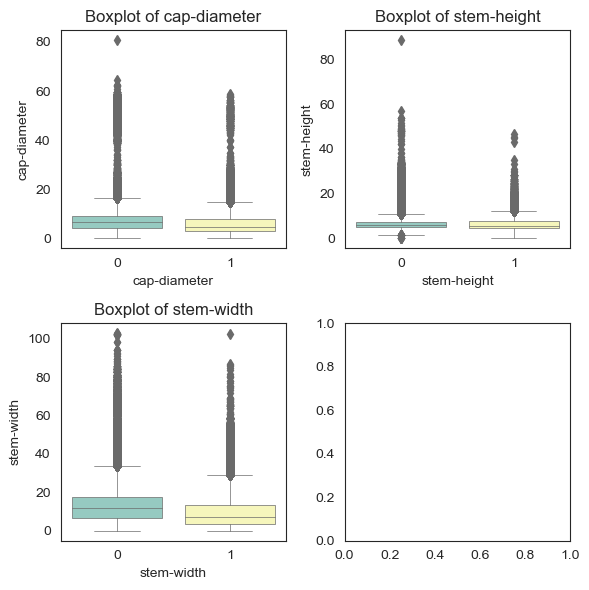

In [97]:
plot_box(train_df)

In [98]:
def distribution_plots(df):   
    num_cols = ['cap-diameter','stem-height','stem-width']
    num_plots = len(num_cols)
    nrows = (num_plots+1)//2
    ncols = 2

    fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(8,8))

    for i,column in enumerate(num_cols):
        row = i //2
        col = i%2
        ax = axes[row,col]
        sns.histplot(x=column,data=train_df,kde=True,bins=50,ax=ax,hue='class',palette='Set3',alpha=0.8)
        ax.set_title(f"Distribution plot of {column}")
        ax.set_xlabel(column)
    plt.tight_layout()
    plt.show()
    plt.close()

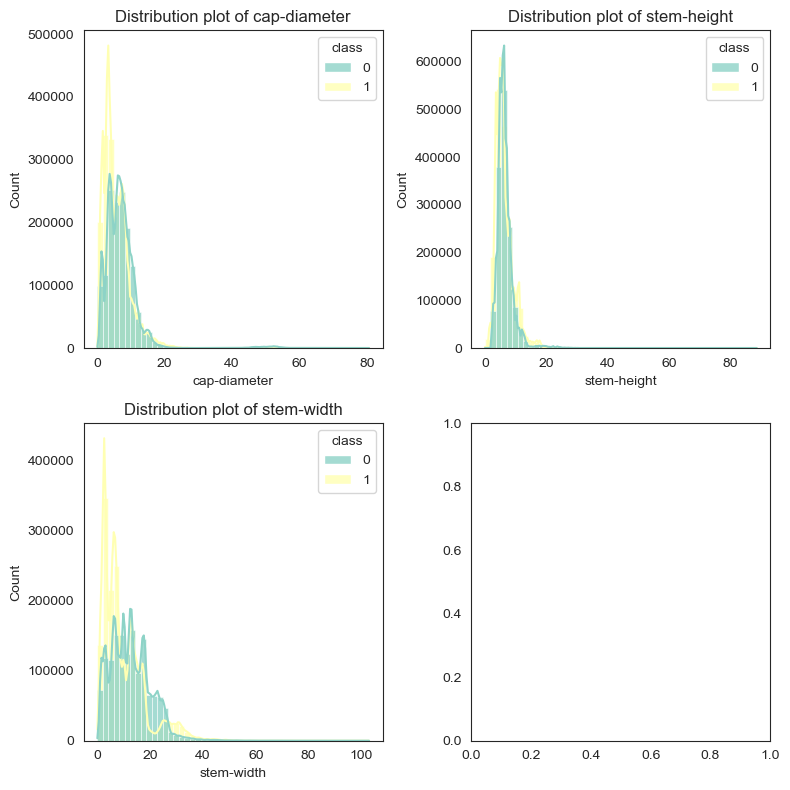

In [99]:
distribution_plots(train_df)

In [100]:
def bar_plots(df):   
    cat_cols = ['cap-shape','cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-color','has-ring','ring-type', 'habitat', 'season']
    num_plots = len(cat_cols)
    nrows = (num_plots+1)//3+1
    ncols = 3

    fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,20))

    for i,column in enumerate(cat_cols):
        row = i //3
        col = i%3
        ax = axes[row,col]
        sns.countplot(x=train_df[column],ax=ax,palette='viridis',linewidth=0.5)
        ax.set_title(f"Distribution plot of {column}")
        ax.set_xlabel(column)
    plt.tight_layout()
    plt.show()
    
    plt.close()

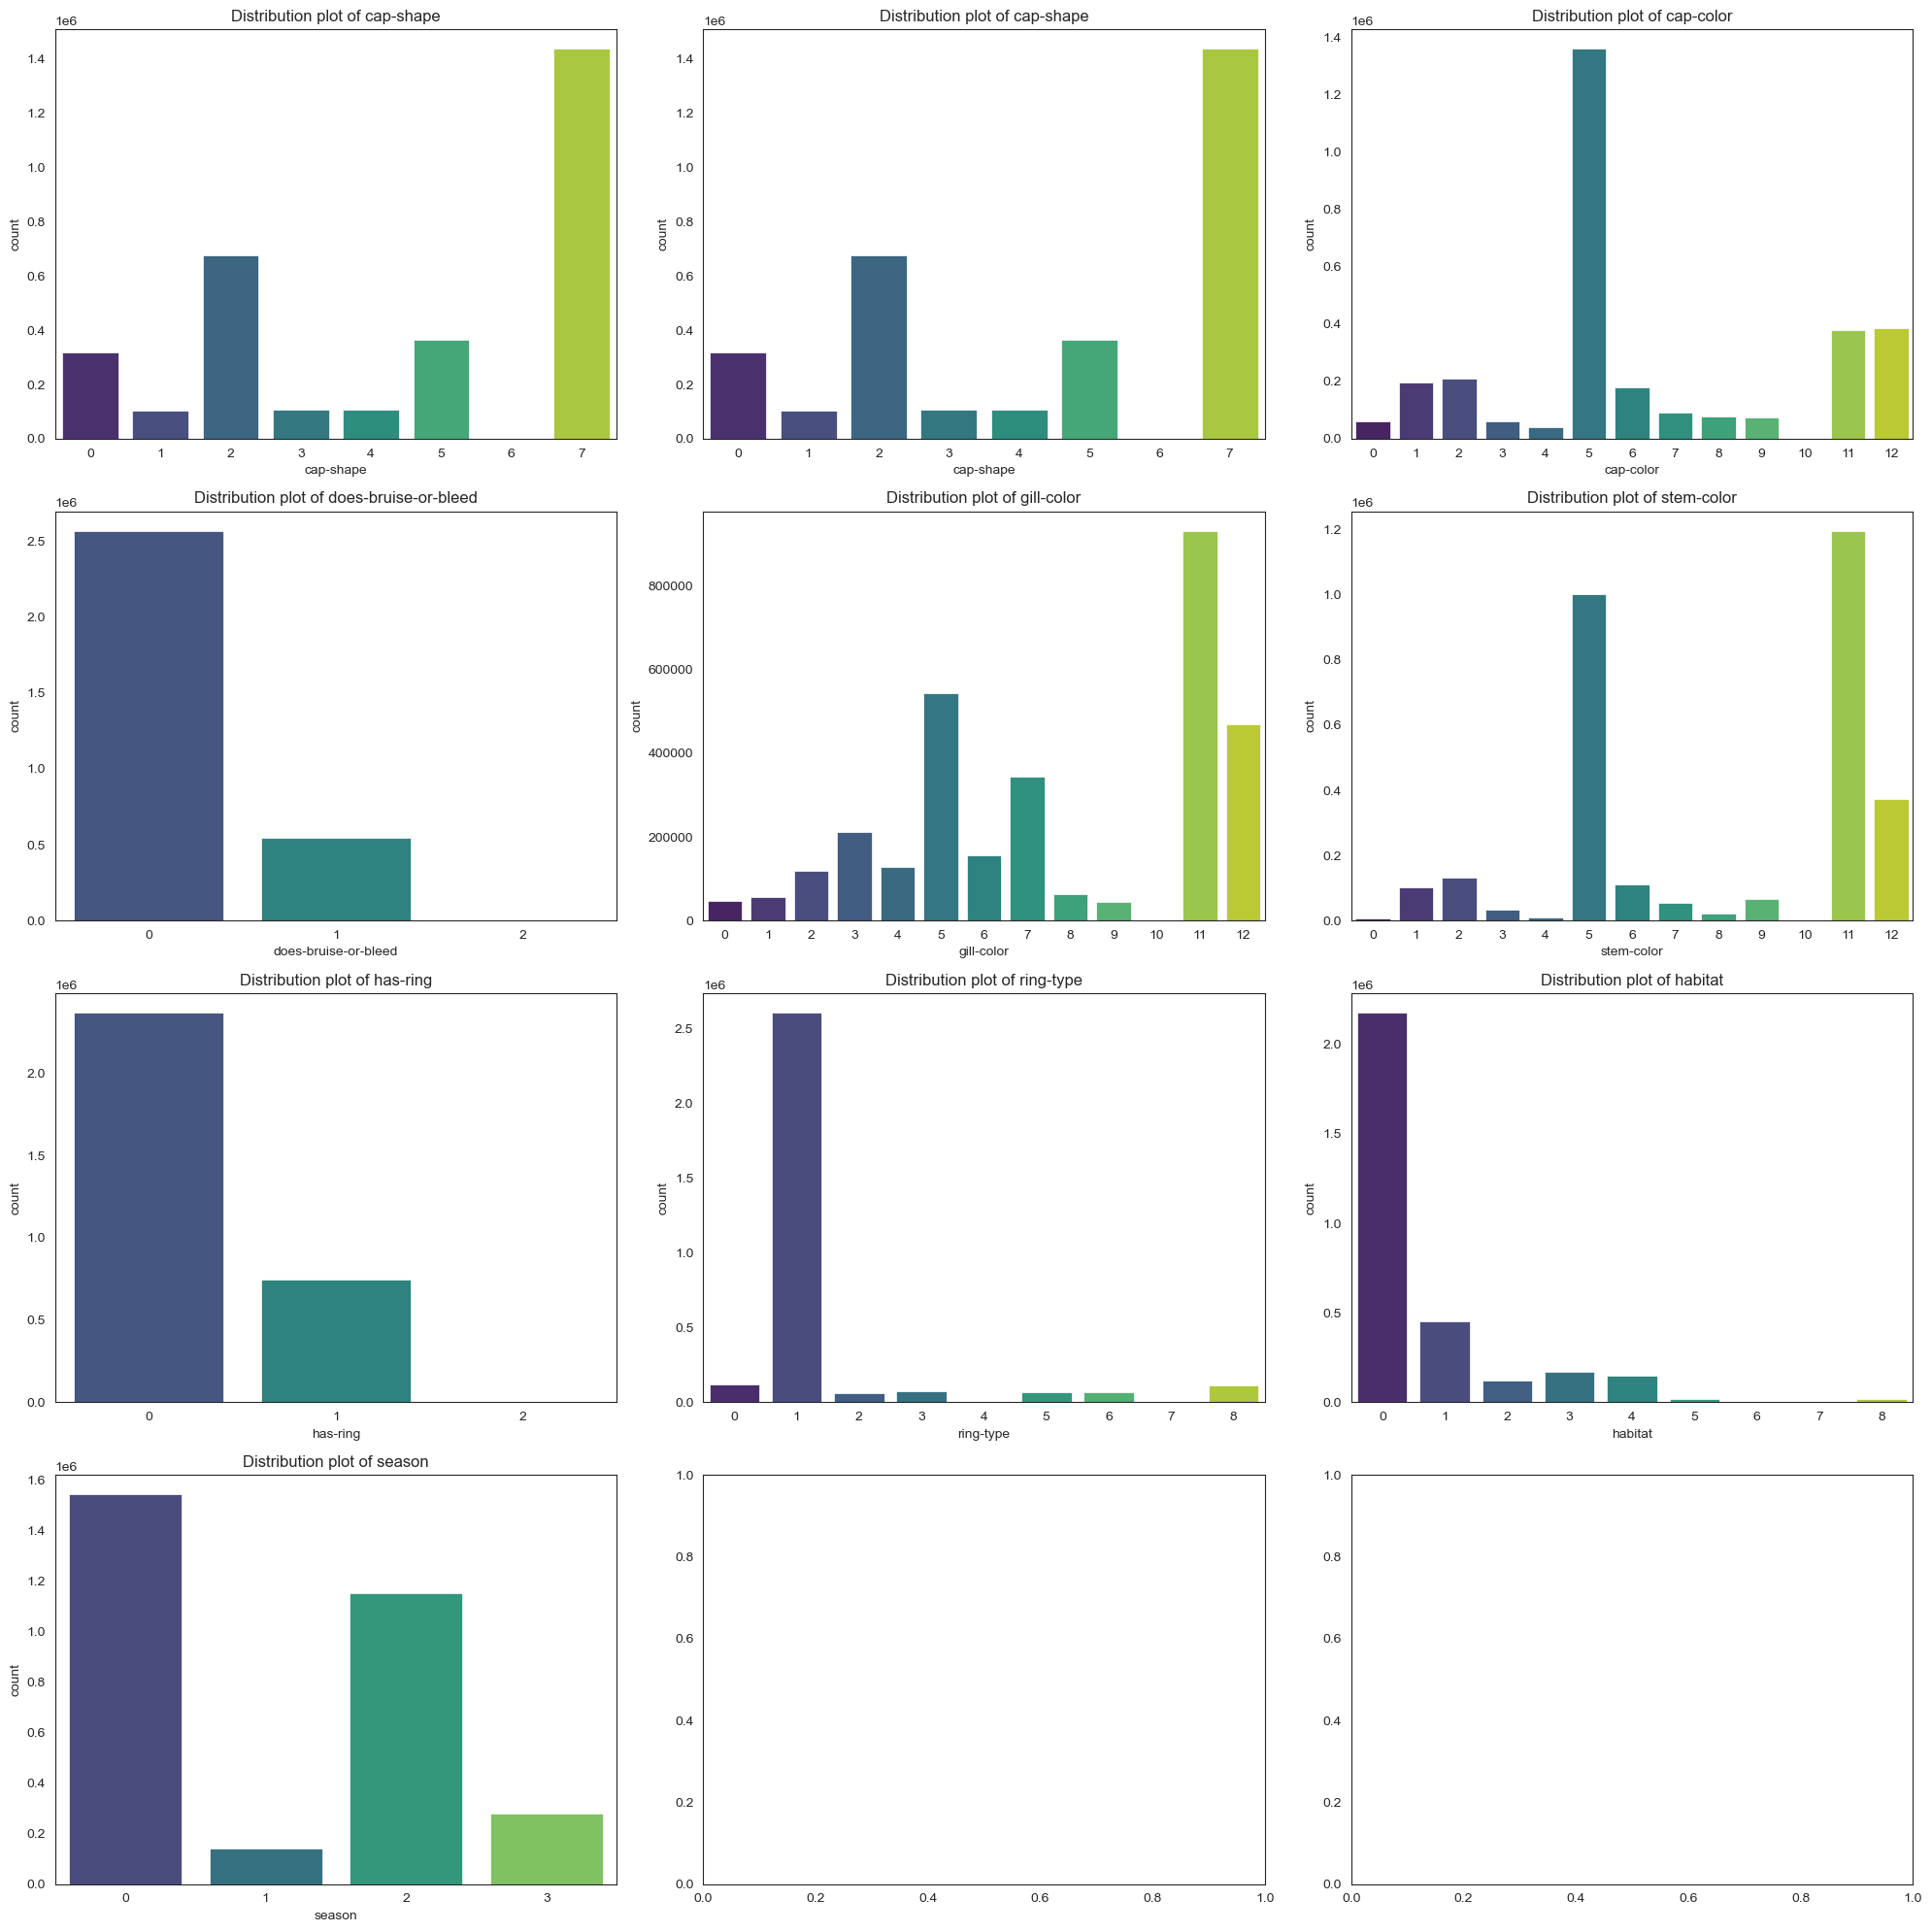

In [101]:
bar_plots(train_df)

### EDA complete

In [102]:
#preprocessing
X_train = train_df.drop('class',axis=1)
y_train = train_df['class']
X_test = test_df

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,stratify=y_train)

In [104]:
#class_map = {'p':1,'e':0}
rev_class_map = {1:'p',0:'e'}

In [109]:
def pred_to_csv(model,name,X_test):
    prediction = model.predict(X_test)
    #convert to csv
    new_test_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s4e8/test.csv')
    pred_df = pd.DataFrame(prediction,columns=["class"])
    pred_df['class'] = pred_df['class'].replace(rev_class_map)
    pred_df = pd.concat([pred_df,new_test_df['id']],axis=1)
    pred_df.set_index("id",inplace=True)
    pred_df.to_csv("ps_s4_e8_"+str(name)+".csv")


### Catboost

In [102]:
from catboost import CatBoostClassifier

In [103]:
cat_ft = np.where(X_train.dtypes!='float32')[0]
cat_ft

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [104]:
parameters = {
    'iterations': 250,                
    'learning_rate': 0.01,               
    'depth': 13,                         
    'l2_leaf_reg': 3,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 8,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [105]:
cat_clf = CatBoostClassifier(
    **parameters
    
)
cat_clf.fit(
    X_train, y_train,
    cat_features=cat_ft,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9469721	best: 0.9469721 (0)	total: 1.74s	remaining: 7m 13s
1:	test: 0.9606656	best: 0.9606656 (1)	total: 3.26s	remaining: 6m 43s
2:	test: 0.9622620	best: 0.9622620 (2)	total: 4.76s	remaining: 6m 31s


KeyboardInterrupt: 

In [ ]:
pred_to_csv(cat_clf,"Cat3",X_test)

In [106]:
from lightgbm import LGBMClassifier

In [ ]:
params = {
    'learning_rate': 0.01,          # Increase learning rate to a more typical value
    'boosting_type': 'gbdt',
    'objective': 'binary',          # Changed objective to binary
    'metric': 'binary_logloss', 
    'sub_feature': 0.8,             # Feature fraction for better generalization
    'num_leaves': 300,               # Further reduce the number of leaves
    'min_child_samples': 15,        # Increase min child samples for better generalization
    'n_estimators': 2000,            # Reduce number of estimators
    'max_depth': 200,                # Set max depth to a reasonable value
    'bagging_fraction': 0.75,       # Reduce bagging fraction to introduce more randomness
    'bagging_freq': 4,              # Bagging every 5 iterations
    'lambda_l1': 0.2,               # Add L1 regularization
    'lambda_l2': 0.2                # Add L2 regularization
}

In [ ]:
lgbm = LGBMClassifier(**params)

In [ ]:
lgbm.fit(X_train,y_train)

In [ ]:
pred_to_csv(lgbm,"LGBM2",X_test)

In [107]:
import numpy as np
import lightgbm as lgbm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import optuna
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)
    cv_scores = np.empty(5)

    for idx, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = lgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train, 
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="binary_logloss",
        )

        preds = model.predict_proba(X_val)
        cv_scores[idx] = log_loss(y_val, preds)

    return np.mean(cv_scores)


In [ ]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=5)

[I 2024-08-15 10:23:49,922] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] min_gain_to_split is set=0.8416412814817209, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8416412814817209
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will

Exception ignored on calling ctypes callback function: <function _log_callback at 0x333174ea0>
Traceback (most recent call last):
  File "/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 224, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

Exception ignored on calling ctypes callback function: <function _log_callback at 0x333174ea0>
Traceback (most recent call last):
  File "/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 224, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train final model with best parameters
best_params = study.best_params

In [106]:
from xgboost import XGBClassifier

In [ ]:
params_xgb = {
    "tree_method": "auto",
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 7,
    "min_child_weight": 1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "gamma": 2,
    "reg_lambda": 1,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 0,
}
cats = X_train.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X_train[col] = X_train[col].astype("category")
import xgboost as xgb
from xgboost import XGBClassifier
xg_cl = XGBClassifier(**params_xgb, enable_categorical=True)
xg_cl.fit(X_train, y_train)
pred_xgb = xg_cl.predict(X_test)


In [110]:
pred_to_csv(xg_cl,"XGB1",X_test)